## Analisi sui dati di controllo

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
arr = np.loadtxt("Spectroscopy/Control/intrap/r68772_mixing.vertex.csv", delimiter = ",", dtype = str)
print(arr[:1])
print(arr[:,10])

[['Run Number' 'Event Number' 'Plot Time (Time axis of TAPlot)'
  'Detector Time (detectors internal clock)' 'OfficialTime (run time)'
  'CutsType0' 'CutsType1' 'CutsType2' 'Vertex Status' 'X' 'Y' 'Z'
  'Number of Helices' 'Number of Tracks']]
['Y' '-1.369550' '-2.852876' ... '-2.239313' '3.104415' '1.387352']


# MIXING DATASET

In [3]:
Xvertex = arr[:,9] ; Yvertex = arr[:,10]; Zvertex = arr[:,11]
Xvertex = np.delete(Xvertex,0) ; Yvertex = np.delete(Yvertex,0); Zvertex = np.delete(Zvertex,0)
Xvertex = np.asarray(Xvertex,dtype= float) ; Yvertex = np.asarray(Yvertex,dtype = float) ; Zvertex = np.asarray(Zvertex,dtype = float)

cut0 = arr[:,5] ; cut0 = np.delete(cut0,0) ; cut0 = np.asarray(cut0, dtype = bool)
cut1 = arr[:,6] ; cut1 = np.delete(cut1,0) ; cut1 = np.asarray(cut1, dtype = bool)
cut2 = arr[:,7] ; cut2 = np.delete(cut2,0) ; cut2 = np.asarray(cut2, dtype = bool)

In [4]:
r = np.sqrt(Xvertex**2 + Yvertex**2)
Rcut0 = r[cut0]
Rcut1 = r[cut1]
Rcut2 = r[cut2]

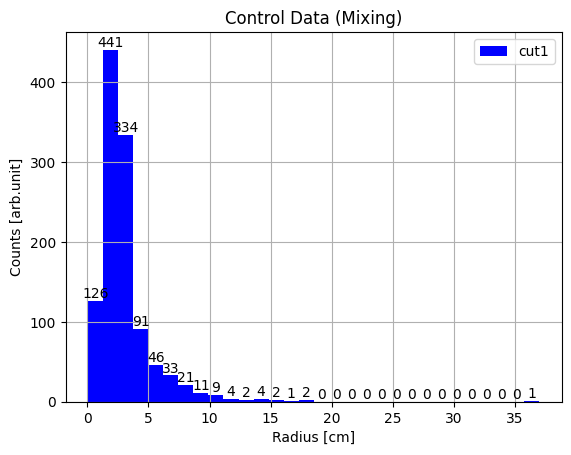

In [5]:
fig, ax = plt.subplots()
plt.grid()
ax.set_title("Control Data (Mixing)")
ax.set_xlabel("Radius [cm]")
ax.set_ylabel("Counts [arb.unit]")
count, edges, bars = ax.hist(Rcut0, bins = 30, color = 'blue', label = "cut1")
plt.legend()
for c in ax.containers:
    ax.bar_label(c)

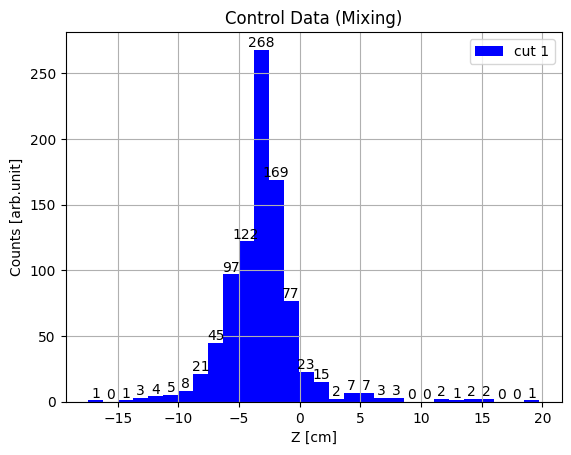

In [6]:
fig, ax = plt.subplots()
plt.grid()
ax.set_title("Control Data (Mixing)")
ax.set_xlabel("Z [cm]")
ax.set_ylabel("Counts [arb.unit]")
count, edges, bars = ax.hist(Zvertex[cut1], bins = 30, color = 'blue', label = "cut 1")
plt.legend()
for c in ax.containers:
    ax.bar_label(c)

## Mixing for selected events

In [7]:
dataSelected = {1 : 'r68814',  2 : 'r68839',  5 : 'r68859', 7 :'r68871' , 8 : 'r68903',   9 : 'r68905', 11 : 'r68927', 21 : 'r69126', 22 : 'r69142'}

for i in dataSelected.keys(): 
    print(dataSelected[i])


stringamix = '_mixing.vertex.csv'

Xmix = np.array([1]) ; Ymix = np.array([1])
print("number of files: ", len(dataSelected), '\n')
Xmix = np.array([1]) ; Ymix = np.array([1])
Cut_mix0 = np.array([1]) ; Cut_mix1 = np.array([1]) ; Cut_mix2 = np.array([2])

# Load data in intrap
for i in dataSelected.keys():
    print("Loading file " + dataSelected[i] + stringamix)
    arr = np.loadtxt("Spectroscopy/Control/intrap/" + dataSelected[i] + stringamix, delimiter = ",", dtype = str)
    Xvertex = arr[:,9] ; Yvertex = arr[:,10]
    Xvertex = np.delete(Xvertex,0) ; Yvertex = np.delete(Yvertex,0) # delete title of the column
    Xvertex = np.asarray(Xvertex,dtype= float) ; Yvertex = np.asarray(Yvertex,dtype = float)
    print("lenght dataset : " , len(Xvertex))
    cut0 = arr[:,5] ; cut0 = np.delete(cut0,0) ; cut0 = np.asarray(cut0, dtype = bool)
    cut1 = arr[:,6] ; cut1 = np.delete(cut1,0) ; cut1 = np.asarray(cut1, dtype = bool)
    cut2 = arr[:,7] ; cut2 = np.delete(cut2,0) ; cut2 = np.asarray(cut2, dtype = bool)
    if i == 1:
        Xmix = Xvertex; Ymix = Yvertex
        Cut_mix0 = cut0 ; Cut_mix1 = cut1 ; Cut_mix2 = cut2
    else:
        Xmix = np.concatenate((Xmix, Xvertex)) ; Ymix = np.concatenate((Ymix, Yvertex))
        Cut_mix0 = np.concatenate((Cut_mix0, cut0)) ;  Cut_mix1 = np.concatenate((Cut_mix1, cut1)) ;  Cut_mix2 = np.concatenate((Cut_mix2, cut2))



r68814
r68839
r68859
r68871
r68903
r68905
r68927
r69126
r69142
number of files:  9 

Loading file r68814_mixing.vertex.csv
lenght dataset :  1250
Loading file r68839_mixing.vertex.csv
lenght dataset :  1239
Loading file r68859_mixing.vertex.csv
lenght dataset :  1242
Loading file r68871_mixing.vertex.csv
lenght dataset :  1242
Loading file r68903_mixing.vertex.csv
lenght dataset :  1240
Loading file r68905_mixing.vertex.csv
lenght dataset :  1240
Loading file r68927_mixing.vertex.csv
lenght dataset :  1245
Loading file r69126_mixing.vertex.csv
lenght dataset :  1231
Loading file r69142_mixing.vertex.csv
lenght dataset :  1237


MIXING, EVENTI dopo taglio 1 :  7632


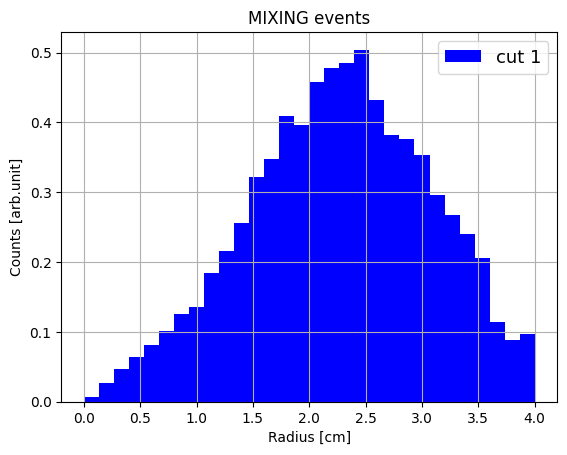

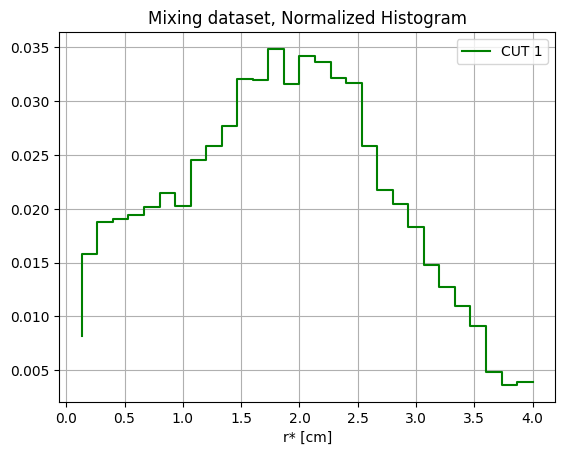

In [8]:
r = np.sqrt(Xmix**2 + Ymix**2)
Rmix0 = r[Cut_mix0]
Rmix1 = r[Cut_mix1]
Rmix2 = r[Cut_mix2]

print("MIXING, EVENTI dopo taglio 1 : ", len(Rmix1))

plt.figure(6)
plt.grid()
#ax.set_xlim(0,4)
plt.title("MIXING events")
plt.xlabel("Radius [cm]")
plt.ylabel("Counts [arb.unit]")
#count, edges, bars = ax1.hist(Rcut0, bins = 30, color = 'blue')
#count, edges, bars = ax.hist(Rcut0, bins = 30, color = 'orange', label = "cut0", histtype = 'step')
Mixcount, Mixedges, bars = plt.hist(Rmix1, range = (0,4), bins = 30, color = 'blue', label = "cut 1",density = True)
plt.legend(fontsize = 13)
#for c in ax.containers:
#    ax.bar_label(c, fontsize = 8)

plt.figure(7)
plt.title("Mixing dataset, Normalized Histogram")
plt.xlabel("r* [cm]")
plt.grid()
tmp = Mixedges[:-1] + np.diff(Mixedges)
normalized = Mixcount/(tmp*2*np.pi)
plt.step(tmp, normalized, color = 'green', label = "CUT 1")
plt.legend()
#plt.savefig("./PlotMLEfit/NormalizedMixing.pdf",format = 'pdf')

## Z distribution

# Uwlosses data for Selected

In [10]:
arr = np.loadtxt("Spectroscopy/Control/intrap/r68772_uwlosses_160.vertex.csv", delimiter = ",", dtype = str)
print(arr[0]) # print(arr[1]) ; print(arr[2])

['Run Number' 'Event Number' 'Plot Time (Time axis of TAPlot)'
 'Detector Time (detectors internal clock)' 'OfficialTime (run time)'
 'CutsType0' 'CutsType1' 'CutsType2' 'Vertex Status' 'X' 'Y' 'Z'
 'Number of Helices' 'Number of Tracks']


In [11]:
'''
Xvertex = arr[:,9] ; Yvertex = arr[:,10]
Xvertex = np.delete(Xvertex,0) ; Yvertex = np.delete(Yvertex,0)
Xvertex = np.asarray(Xvertex,dtype= float) ; Yvertex = np.asarray(Yvertex,dtype = float)
cut0 = arr[:,5] ; cut0 = np.delete(cut0,0) ; cut0 = np.asarray(cut0, dtype = bool)
cut1 = arr[:,6] ; cut1 = np.delete(cut1,0) ; cut1 = np.asarray(cut1, dtype = bool)
cut2 = arr[:,7] ; cut2 = np.delete(cut2,0) ; cut2 = np.asarray(cut2, dtype = bool)
r = np.sqrt(Xvertex**2 + Yvertex**2)
Rcut0 = r[cut0]
Rcut1 = r[cut1]
Rcut2 = r[cut2]

fig1, ax1 = plt.subplots()
plt.grid()
ax1.set_xlim(0,4)
ax1.set_title("Control Data (Uwlosses)")
ax1.set_xlabel("Radius [cm]")
ax1.set_ylabel("Counts [arb.unit]")
#count, edges, bars = ax1.hist(Rcut0, bins = 30, color = 'blue')
#count1, edges1, bars1 = ax1.hist(Rcut0, bins = 30, color = 'orange', label = "cut0", histtype = 'step')
count2, edges2, bars2 = ax1.hist(Rcut1, bins = 30, color = 'black', label = "cut1", histtype = 'step')
plt.legend()
'''

'\nXvertex = arr[:,9] ; Yvertex = arr[:,10]\nXvertex = np.delete(Xvertex,0) ; Yvertex = np.delete(Yvertex,0)\nXvertex = np.asarray(Xvertex,dtype= float) ; Yvertex = np.asarray(Yvertex,dtype = float)\ncut0 = arr[:,5] ; cut0 = np.delete(cut0,0) ; cut0 = np.asarray(cut0, dtype = bool)\ncut1 = arr[:,6] ; cut1 = np.delete(cut1,0) ; cut1 = np.asarray(cut1, dtype = bool)\ncut2 = arr[:,7] ; cut2 = np.delete(cut2,0) ; cut2 = np.asarray(cut2, dtype = bool)\nr = np.sqrt(Xvertex**2 + Yvertex**2)\nRcut0 = r[cut0]\nRcut1 = r[cut1]\nRcut2 = r[cut2]\n\nfig1, ax1 = plt.subplots()\nplt.grid()\nax1.set_xlim(0,4)\nax1.set_title("Control Data (Uwlosses)")\nax1.set_xlabel("Radius [cm]")\nax1.set_ylabel("Counts [arb.unit]")\n#count, edges, bars = ax1.hist(Rcut0, bins = 30, color = \'blue\')\n#count1, edges1, bars1 = ax1.hist(Rcut0, bins = 30, color = \'orange\', label = "cut0", histtype = \'step\')\ncount2, edges2, bars2 = ax1.hist(Rcut1, bins = 30, color = \'black\', label = "cut1", histtype = \'step\')\npl

In [12]:
dataSelected = {1 : 'r68814',  2 : 'r68839',  5 : 'r68859', 7 :'r68871' , 8 : 'r68903',   9 : 'r68905', 11 : 'r68927', 21 : 'r69126', 22 : 'r69142'}

stringaUw = '_uwlosses_160.vertex.csv'

Xuw = np.array([1]) ; Yuw = np.array([1])
print("number of files: ", len(dataSelected), '\n')
Xuw = np.array([1]) ; Yuw = np.array([1])
Cut_uw0 = np.array([1]) ; Cut_uw1 = np.array([1]) ; Cut_uw2 = np.array([2])

# Load data in intrap
for i in dataSelected.keys():
    print("Loading file " + dataSelected[i] + stringaUw)
    arr = np.loadtxt("Spectroscopy/Control/intrap/" + dataSelected[i] + stringaUw, delimiter = ",", dtype = str)
    Xvertex = arr[:,9] ; Yvertex = arr[:,10]
    Xvertex = np.delete(Xvertex,0) ; Yvertex = np.delete(Yvertex,0) # delete title of the column
    Xvertex = np.asarray(Xvertex,dtype= float) ; Yvertex = np.asarray(Yvertex,dtype = float)
    print("lenght dataset : " , len(Xvertex))
    cut0 = arr[:,5] ; cut0 = np.delete(cut0,0) ; cut0 = np.asarray(cut0, dtype = bool)
    cut1 = arr[:,6] ; cut1 = np.delete(cut1,0) ; cut1 = np.asarray(cut1, dtype = bool)
    cut2 = arr[:,7] ; cut2 = np.delete(cut2,0) ; cut2 = np.asarray(cut2, dtype = bool)
    if i == 1:
        Xuw = Xvertex; Yuw = Yvertex
        Cut_uw0 = cut0 ; Cut_uw1 = cut1 ; Cut_uw2 = cut2
    else:
        Xuw = np.concatenate((Xuw, Xvertex)) ; Yuw = np.concatenate((Yuw, Yvertex))
        Cut_uw0 = np.concatenate((Cut_uw0, cut0)) ;  Cut_uw1 = np.concatenate((Cut_uw1, cut1)) ;  Cut_uw2 = np.concatenate((Cut_uw2, cut2))


number of files:  9 

Loading file r68814_uwlosses_160.vertex.csv
lenght dataset :  1574
Loading file r68839_uwlosses_160.vertex.csv
lenght dataset :  1565
Loading file r68859_uwlosses_160.vertex.csv
lenght dataset :  1622
Loading file r68871_uwlosses_160.vertex.csv
lenght dataset :  1587
Loading file r68903_uwlosses_160.vertex.csv
lenght dataset :  1608
Loading file r68905_uwlosses_160.vertex.csv
lenght dataset :  1632
Loading file r68927_uwlosses_160.vertex.csv
lenght dataset :  1652
Loading file r69126_uwlosses_160.vertex.csv
lenght dataset :  1814
Loading file r69142_uwlosses_160.vertex.csv
lenght dataset :  1638


UWlosses, EVENTI dopo taglio 1 :  792


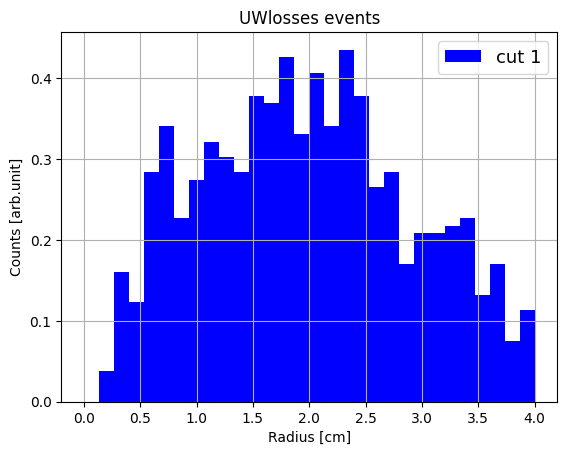

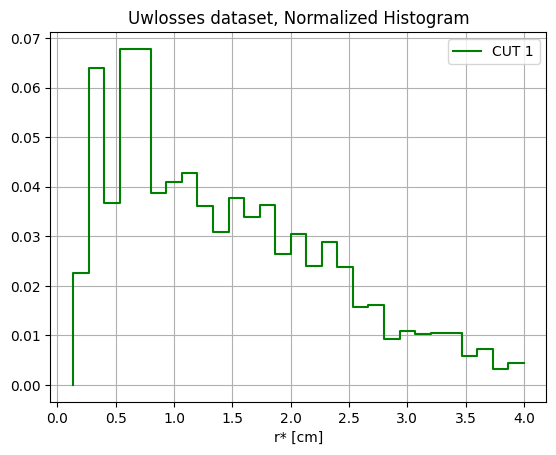

In [13]:
r = np.sqrt(Xuw**2 + Yuw**2)
Ruw0 = r[Cut_uw0]
Ruw1 = r[Cut_uw1]
Ruw2 = r[Cut_uw2]

print("UWlosses, EVENTI dopo taglio 1 : ", len(Ruw1))

plt.figure(6)
plt.grid()
#ax.set_xlim(0,4)
plt.title("UWlosses events")
plt.xlabel("Radius [cm]")
plt.ylabel("Counts [arb.unit]")
#count, edges, bars = ax1.hist(Rcut0, bins = 30, color = 'blue')
#count, edges, bars = ax.hist(Rcut0, bins = 30, color = 'orange', label = "cut0", histtype = 'step')
UWcount, UWedges, bars = plt.hist(Ruw1, range = (0,4), bins = 30, color = 'blue', label = "cut 1", density = True)
plt.legend(fontsize = 13)
#for c in ax.containers:
#    ax.bar_label(c, fontsize = 8)

plt.figure(7)
plt.title("Uwlosses dataset, Normalized Histogram")
plt.xlabel("r* [cm]")
plt.grid()
tmp = UWedges[:-1] + np.diff(UWedges)
normalized = UWcount/(tmp*2*np.pi)
plt.step(tmp, normalized, color = 'green', label = "CUT 1")
plt.legend()
#plt.savefig("./PlotMLEfit/NormalizedUW.pdf",format = 'pdf')

## all uwlosses files together

In [14]:
stringa = '_uwlosses_160.vertex.csv'
data = {0 : 'r68772', 1 : 'r68814', 2 : 'r68839', 3 : 'r68847', 4 : 'r68855', 5 : 'r68859', 6 : 'r68865', 7 :'r68871',
        8 : 'r68903' , 9 : 'r68905', 10 : 'r68916', 11 : 'r68927', 12 : 'r68994', 13 : 'r69014', 15 : 'r69029', 16 : 'r69037', 17 : 'r69044', 18 : 'r69081', 19 : 'r69092', 20 : 'r69111', 21 : 'r69126', 22 : 'r69142'}

print("number of files: ", len(data))
print("\n" , data.items(), "\n")

Xvertices = np.array([1]) ; Yvertices = np.array([1]) ; Zvertices = np.array([1])
Cut_tot0 = np.array([1]) ; Cut_tot1 = np.array([1]) ; Cut_tot2 = np.array([2])

for i in data.keys():
    print("Loading file " + data[i] + "\n")
    arr = np.loadtxt("Spectroscopy/Control/intrap/" + data[i] + stringa, delimiter = ",", dtype = str)
    # linking the data to the array Xvertex, Yvertex and Zvertex
    Xvertex = arr[:,9] ; Yvertex = arr[:,10] ; Zvertex = arr[:,11]
    Xvertex = np.delete(Xvertex,0) ; Yvertex = np.delete(Yvertex,0); Zvertex = np.delete(Zvertex,0)
    Xvertex = np.asarray(Xvertex,dtype= float) ; Yvertex = np.asarray(Yvertex,dtype = float) ; Zvertex = np.asarray(Zvertex, dtype = float)
    cut0 = arr[:,5] ; cut0 = np.delete(cut0,0) ; cut0 = np.asarray(cut0, dtype = bool)
    cut1 = arr[:,6] ; cut1 = np.delete(cut1,0) ; cut1 = np.asarray(cut1, dtype = bool)
    cut2 = arr[:,7] ; cut2 = np.delete(cut2,0) ; cut2 = np.asarray(cut2, dtype = bool)
    if i == 1:
        Xvertices = Xvertex; Yvertices = Yvertex; Zvertices = Zvertex 
        Cut_tot0 = cut0 ; Cut_tot1 = cut1 ; Cut_tot2 = cut2
    else:
        Xvertices = np.concatenate((Xvertices, Xvertex)) ; Yvertices = np.concatenate((Yvertices, Yvertex)) ; Zvertices = np.concatenate((Zvertices, Zvertex))
        Cut_tot0 = np.concatenate((Cut_tot0, cut0)) ;  Cut_tot1 = np.concatenate((Cut_tot1, cut1)) ;  Cut_tot2 = np.concatenate((Cut_tot2, cut2))
    
print(Xvertices)
print(Yvertices)

number of files:  22

 dict_items([(0, 'r68772'), (1, 'r68814'), (2, 'r68839'), (3, 'r68847'), (4, 'r68855'), (5, 'r68859'), (6, 'r68865'), (7, 'r68871'), (8, 'r68903'), (9, 'r68905'), (10, 'r68916'), (11, 'r68927'), (12, 'r68994'), (13, 'r69014'), (15, 'r69029'), (16, 'r69037'), (17, 'r69044'), (18, 'r69081'), (19, 'r69092'), (20, 'r69111'), (21, 'r69126'), (22, 'r69142')]) 

Loading file r68772

Loading file r68814

Loading file r68839

Loading file r68847

Loading file r68855

Loading file r68859

Loading file r68865

Loading file r68871

Loading file r68903

Loading file r68905

Loading file r68916

Loading file r68927

Loading file r68994

Loading file r69014

Loading file r69029

Loading file r69037

Loading file r69044

Loading file r69081

Loading file r69092

Loading file r69111

Loading file r69126

Loading file r69142

[  4.534056   0.675494   0.107711 ... -99.         4.385492   1.320378]
[ -8.482444  -1.603143  -2.200128 ... -99.        -1.385271  -0.751419]


2408


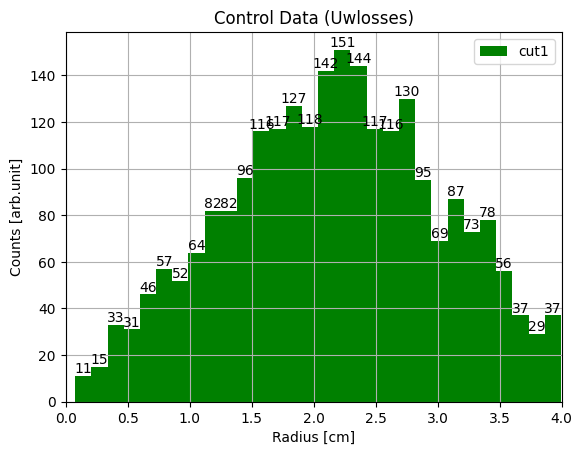

In [15]:
r = np.sqrt(Xvertices**2 + Yvertices**2)
Rcut0 = r[Cut_tot0]
Rcut1 = r[Cut_tot1]
Rcut2 = r[Cut_tot2]
print(len(Rcut1))
fig, ax = plt.subplots()
plt.grid()
ax.set_xlim(0,4)
ax.set_title("Control Data (Uwlosses)")
ax.set_xlabel("Radius [cm]")
ax.set_ylabel("Counts [arb.unit]")
#count, edges, bars = ax1.hist(Rcut0, bins = 30, color = 'blue')
#count, edges, bars = ax.hist(Rcut0, bins = 30, color = 'orange', label = "cut0", histtype = 'step')
count, edges, bars = ax.hist(Rcut1, bins = 30, color = 'green', label = "cut1")
plt.legend()
for c in ax.containers:
    ax.bar_label(c)

# Distribution in Z

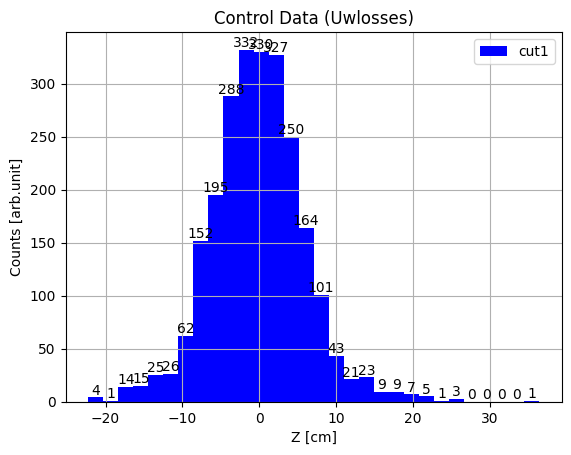

In [16]:
fig, ax = plt.subplots()
plt.grid()
ax.set_title("Control Data (Uwlosses)")
ax.set_xlabel("Z [cm]")
ax.set_ylabel("Counts [arb.unit]")
count, edges, bars = ax.hist(Zvertices[Cut_tot1], bins = 30, color = 'blue', label = "cut1")
plt.legend()
for c in ax.containers:
    ax.bar_label(c)

# BACKGROUND
### Now we study the background due to the cosmic rays
convenzioni 
Cut_tot + number are the boolean  array for the selection ; Xvertices and Yvertices are the array to store the data about the vertex

In [17]:
stringa = '_background.vertex.csv' ; stringa2 = '_cosmics.vertex.csv'
data = {0 : 'r68772', 1 : 'r68814', 2 : 'r68839', 3 : 'r68847', 4 : 'r68855', 5 : 'r68859', 6 : 'r68865', 7 :'r68871',
        8 : 'r68903' , 9 : 'r68905', 10 : 'r68916', 11 : 'r68927', 12 : 'r68994', 13 : 'r69014', 15 : 'r69029', 16 : 'r69037', 17 : 'r69044', 18 : 'r69081', 19 : 'r69092', 20 : 'r69111', 21 : 'r69126', 22 : 'r69142'}


dataCosmic = {0: 'r68949', 1 : 'r69177', 2: 'r69207', 3 : 'r69219'}

for i in dataCosmic.keys():
    print(dataCosmic[i])

Xvertices = np.array([1]) ; Yvertices = np.array([1])
print("number of files: ", len(data), '\n')
Xvertices = np.array([1]) ; Yvertices = np.array([1])
Cut_tot0 = np.array([1]) ; Cut_tot1 = np.array([1]) ; Cut_tot2 = np.array([2])

# Load data in intrap
for i in data.keys():
    print("Loading file " + data[i] + stringa)
    arr = np.loadtxt("Spectroscopy/Control/intrap/" + data[i] + stringa, delimiter = ",", dtype = str)
    Xvertex = arr[:,9] ; Yvertex = arr[:,10]
    Xvertex = np.delete(Xvertex,0) ; Yvertex = np.delete(Yvertex,0) # delete title of the column
    Xvertex = np.asarray(Xvertex,dtype= float) ; Yvertex = np.asarray(Yvertex,dtype = float)
    print("lenght dataset : " , len(Xvertex))
    cut0 = arr[:,5] ; cut0 = np.delete(cut0,0) ; cut0 = np.asarray(cut0, dtype = bool)
    cut1 = arr[:,6] ; cut1 = np.delete(cut1,0) ; cut1 = np.asarray(cut1, dtype = bool)
    cut2 = arr[:,7] ; cut2 = np.delete(cut2,0) ; cut2 = np.asarray(cut2, dtype = bool)
    if i == 1:
        Xvertices = Xvertex; Yvertices = Yvertex
        Cut_tot0 = cut0 ; Cut_tot1 = cut1 ; Cut_tot2 = cut2
    else:
        Xvertices = np.concatenate((Xvertices, Xvertex)) ; Yvertices = np.concatenate((Yvertices, Yvertex))
        Cut_tot0 = np.concatenate((Cut_tot0, cut0)) ;  Cut_tot1 = np.concatenate((Cut_tot1, cut1)) ;  Cut_tot2 = np.concatenate((Cut_tot2, cut2))

#load data in Cosmic
for i in dataCosmic.keys():
    print("Loading file " + data[i] + stringa2)
    arr = np.loadtxt("Spectroscopy/Control/cosmic/" + dataCosmic[i] + stringa2, delimiter = ",", dtype = str)
    Xvertex = arr[:,9] ; Yvertex = arr[:,10]
    Xvertex = np.delete(Xvertex,0) ; Yvertex = np.delete(Yvertex,0)
    Xvertex = np.asarray(Xvertex,dtype= float) ; Yvertex = np.asarray(Yvertex,dtype = float)
    print("lenght dataset : " , len(Xvertex))
    cut0 = arr[:,5] ; cut0 = np.delete(cut0,0) ; cut0 = np.asarray(cut0, dtype = bool)
    cut1 = arr[:,6] ; cut1 = np.delete(cut1,0) ; cut1 = np.asarray(cut1, dtype = bool)
    cut2 = arr[:,7] ; cut2 = np.delete(cut2,0) ; cut2 = np.asarray(cut2, dtype = bool)
    Xvertices = np.concatenate((Xvertices, Xvertex)) ; Yvertices = np.concatenate((Yvertices, Yvertex))
    Cut_tot0 = np.concatenate((Cut_tot0, cut0)) ;  Cut_tot1 = np.concatenate((Cut_tot1, cut1)) ;  Cut_tot2 = np.concatenate((Cut_tot2, cut2))
    
print("lunghezza totale dei run: " , len(Xvertices))

r68949
r69177
r69207
r69219
number of files:  22 

Loading file r68772_background.vertex.csv
lenght dataset :  98
Loading file r68814_background.vertex.csv
lenght dataset :  108
Loading file r68839_background.vertex.csv
lenght dataset :  85
Loading file r68847_background.vertex.csv
lenght dataset :  95
Loading file r68855_background.vertex.csv
lenght dataset :  104
Loading file r68859_background.vertex.csv
lenght dataset :  80
Loading file r68865_background.vertex.csv
lenght dataset :  86
Loading file r68871_background.vertex.csv
lenght dataset :  96
Loading file r68903_background.vertex.csv
lenght dataset :  86
Loading file r68905_background.vertex.csv
lenght dataset :  89
Loading file r68916_background.vertex.csv
lenght dataset :  81
Loading file r68927_background.vertex.csv
lenght dataset :  97
Loading file r68994_background.vertex.csv
lenght dataset :  100
Loading file r69014_background.vertex.csv
lenght dataset :  77
Loading file r69029_background.vertex.csv
lenght dataset :  101


1786


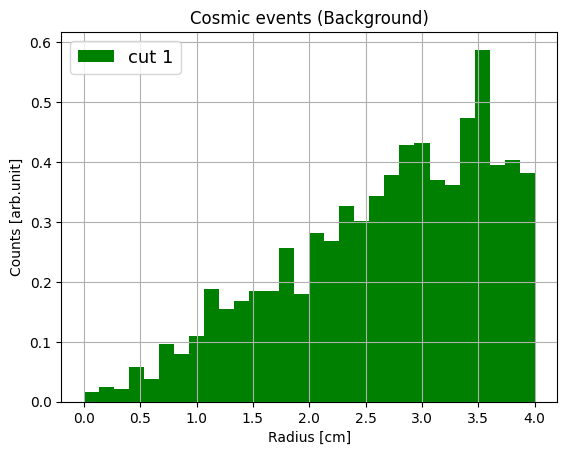

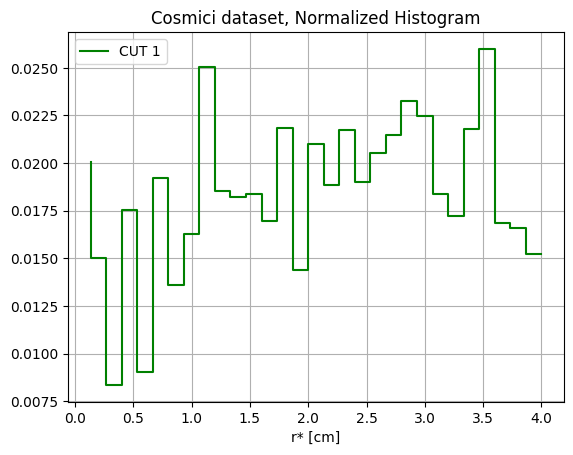

In [18]:
Rback = np.sqrt(Xvertices**2 + Yvertices**2)
Rback0 = Rback[Cut_tot0]
Rback1 = Rback[Cut_tot1]
Rback2 = Rback[Cut_tot2]
print(len(Rback1))

plt.figure(14)
plt.grid()
#ax.set_xlim(0,4)
plt.title("Cosmic events (Background)")
plt.xlabel("Radius [cm]")
plt.ylabel("Counts [arb.unit]")
#count, edges, bars = ax1.hist(Rcut0, bins = 30, color = 'blue')
#count, edges, bars = ax.hist(Rcut0, bins = 30, color = 'orange', label = "cut0", histtype = 'step')
BKcount, BKedges, bars = plt.hist(Rback1, range = (0,4), bins = 30, color = 'green', label = "cut 1",density = True)
plt.legend(fontsize = 13)
#for c in ax.containers:
#    ax.bar_label(c, fontsize = 8)

plt.figure(15)
plt.title("Cosmici dataset, Normalized Histogram")
plt.xlabel("r* [cm]")
plt.grid()
tmp = BKedges[:-1] + np.diff(BKedges)
normalized = BKcount/(tmp*2*np.pi)
plt.step(tmp, normalized, color = 'green', label = "CUT 1")
plt.legend()
#plt.savefig("./PlotMLEfit/NormalizedBK.pdf",format = 'pdf')



# Radial density plot

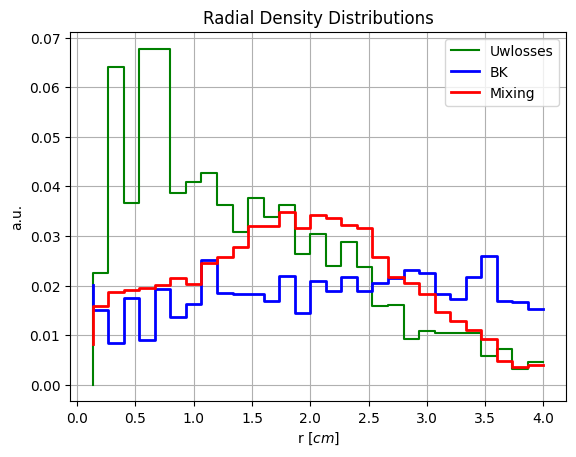

In [20]:
plt.figure(13231)
plt.title("Radial Density Distributions")
plt.xlabel(r"r [$cm$]")
plt.ylabel("a.u.")
plt.grid()
tmp = UWedges[:-1] + np.diff(UWedges)
normalized = UWcount/(tmp*2*np.pi)
plt.step(tmp, normalized, color = 'green', label = "Uwlosses", linewidth = 1.5)
tmp = BKedges[:-1] + np.diff(BKedges)
normalized = BKcount/(tmp*2*np.pi)
plt.step(tmp, normalized, color = 'blue', label = "BK", linewidth = 2)
tmp = Mixedges[:-1] + np.diff(Mixedges)
normalized = Mixcount/(tmp*2*np.pi)
plt.step(tmp, normalized, color = 'red', label = "Mixing", linewidth = 2)


plt.legend()
plt.savefig("./PlotMLEfit/RadialDensity.pdf",format = 'pdf',bbox_inches="tight")

# HOLD data

In [19]:
hold = np.loadtxt("Spectroscopy/Control/intrap/r68772_prehold.vertex.csv", delimiter = ",", dtype = str)
print(hold[:1])

'''
Xvertex = hold[:,9] ; Yvertex = hold[:,10]
Xvertex = np.delete(Xvertex,0) ; Yvertex = np.delete(Yvertex,0)
Xvertex = np.asarray(Xvertex,dtype= float) ; Yvertex = np.asarray(Yvertex,dtype = float)
cut0 = hold[:,5] ; cut0 = np.delete(cut0,0) ; cut0 = np.asarray(cut0, dtype = bool)
cut1 = hold[:,6] ; cut1 = np.delete(cut1,0) ; cut1 = np.asarray(cut1, dtype = bool)
cut2 = hold[:,7] ; cut2 = np.delete(cut2,0) ; cut2 = np.asarray(cut2, dtype = bool)
r = np.sqrt(Xvertex**2 + Yvertex**2)
Rcut0 = r[cut0]
Rcut1 = r[cut1]
Rcut2 = r[cut2]

fig2, ax2 = plt.subplots()
plt.grid()
ax2.set_title("Control Data (Hold)")
ax2.set_xlabel("Radius [cm]")
ax2.set_ylabel("Counts [arb.unit]")
count, edges, bars = ax2.hist(Rcut1, bins = 30, color = 'blue',label = 'cut1')
plt.legend()
for c in ax.containers:
    ax2.bar_label(c)
'''

[['Run Number' 'Event Number' 'Plot Time (Time axis of TAPlot)'
  'Detector Time (detectors internal clock)' 'OfficialTime (run time)'
  'CutsType0' 'CutsType1' 'CutsType2' 'Vertex Status' 'X' 'Y' 'Z'
  'Number of Helices' 'Number of Tracks']]


'\nXvertex = hold[:,9] ; Yvertex = hold[:,10]\nXvertex = np.delete(Xvertex,0) ; Yvertex = np.delete(Yvertex,0)\nXvertex = np.asarray(Xvertex,dtype= float) ; Yvertex = np.asarray(Yvertex,dtype = float)\ncut0 = hold[:,5] ; cut0 = np.delete(cut0,0) ; cut0 = np.asarray(cut0, dtype = bool)\ncut1 = hold[:,6] ; cut1 = np.delete(cut1,0) ; cut1 = np.asarray(cut1, dtype = bool)\ncut2 = hold[:,7] ; cut2 = np.delete(cut2,0) ; cut2 = np.asarray(cut2, dtype = bool)\nr = np.sqrt(Xvertex**2 + Yvertex**2)\nRcut0 = r[cut0]\nRcut1 = r[cut1]\nRcut2 = r[cut2]\n\nfig2, ax2 = plt.subplots()\nplt.grid()\nax2.set_title("Control Data (Hold)")\nax2.set_xlabel("Radius [cm]")\nax2.set_ylabel("Counts [arb.unit]")\ncount, edges, bars = ax2.hist(Rcut1, bins = 30, color = \'blue\',label = \'cut1\')\nplt.legend()\nfor c in ax.containers:\n    ax2.bar_label(c)\n'

In [20]:
data = {0 : 'r68772', 1 : 'r68814', 2 : 'r68839', 3 : 'r68847', 4 : 'r68855', 5 : 'r68859', 6 : 'r68865', 7 :'r68871',
        8 : 'r68903' , 9 : 'r68905', 10 : 'r68916', 11 : 'r68927', 12 : 'r68994', 13 : 'r69014', 15 : 'r69029', 16 : 'r69037', 17 : 'r69044', 18 : 'r69081', 19 : 'r69092', 20 : 'r69111', 21 : 'r69126', 22 : 'r69142'}

dataSelected = {1 : 'r68814',  2 : 'r68839',  5 : 'r68859', 7 :'r68871' , 8 : 'r68903',   9 : 'r68905', 11 : 'r68927', 21 : 'r69126', 22 : 'r69142'}

In [21]:
stringaHold = '_prehold.vertex.csv'

Xhold = np.array([1]) ; Yhold = np.array([1])
print("number of files: ", len(data), '\n')
Xhold = np.array([1]) ; Yhold = np.array([1])
Cut_hold0 = np.array([1]) ; Cut_hold1 = np.array([1]) ; Cut_hold2 = np.array([2])

# Load data in intrap
for i in dataSelected.keys():
    print("Loading file " + data[i] + stringaHold)
    arr = np.loadtxt("Spectroscopy/Control/intrap/" + data[i] + stringaHold, delimiter = ",", dtype = str)
    Xvertex = arr[:,9] ; Yvertex = arr[:,10]
    Xvertex = np.delete(Xvertex,0) ; Yvertex = np.delete(Yvertex,0) # delete title of the column
    Xvertex = np.asarray(Xvertex,dtype= float) ; Yvertex = np.asarray(Yvertex,dtype = float)
    print("lenght dataset : " , len(Xvertex))
    cut0 = arr[:,5] ; cut0 = np.delete(cut0,0) ; cut0 = np.asarray(cut0, dtype = bool)
    cut1 = arr[:,6] ; cut1 = np.delete(cut1,0) ; cut1 = np.asarray(cut1, dtype = bool)
    cut2 = arr[:,7] ; cut2 = np.delete(cut2,0) ; cut2 = np.asarray(cut2, dtype = bool)
    if i == 1:
        Xhold = Xvertex; Yhold = Yvertex
        Cut_hold0 = cut0 ; Cut_hold1 = cut1 ; Cut_hold2 = cut2
    else:
        Xhold = np.concatenate((Xhold, Xvertex)) ; Yhold = np.concatenate((Yhold, Yvertex))
        Cut_hold0 = np.concatenate((Cut_hold0, cut0)) ;  Cut_hold1 = np.concatenate((Cut_hold1, cut1)) ;  Cut_hold2 = np.concatenate((Cut_hold2, cut2))

number of files:  22 

Loading file r68814_prehold.vertex.csv
lenght dataset :  16012
Loading file r68839_prehold.vertex.csv
lenght dataset :  26484
Loading file r68859_prehold.vertex.csv
lenght dataset :  21679
Loading file r68871_prehold.vertex.csv
lenght dataset :  25037
Loading file r68903_prehold.vertex.csv
lenght dataset :  41977
Loading file r68905_prehold.vertex.csv
lenght dataset :  15058
Loading file r68927_prehold.vertex.csv
lenght dataset :  19701
Loading file r69126_prehold.vertex.csv
lenght dataset :  21023
Loading file r69142_prehold.vertex.csv
lenght dataset :  12817


HOLD, EVENTI dopo taglio 1 :  1705


<Figure size 640x480 with 0 Axes>

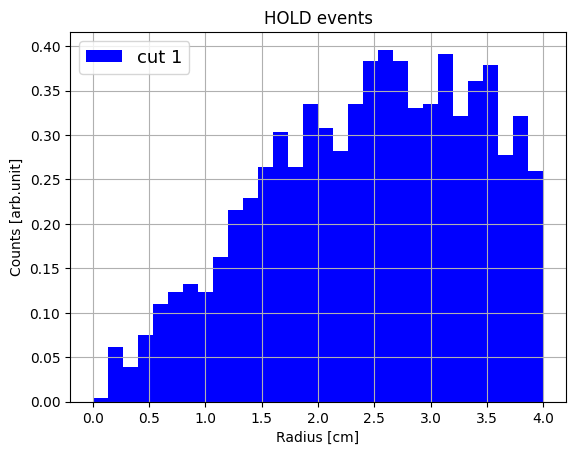

In [22]:
r = np.sqrt(Xhold**2 + Yhold**2)
Rhold0 = r[Cut_hold0]
Rhold1 = r[Cut_hold1]
Rhold2 = r[Cut_hold2]

print("HOLD, EVENTI dopo taglio 1 : ", len(Rhold1))

plt.figure(6)
fig, ax = plt.subplots()
plt.grid()
#ax.set_xlim(0,4)
ax.set_title("HOLD events")
ax.set_xlabel("Radius [cm]")
ax.set_ylabel("Counts [arb.unit]")
#count, edges, bars = ax1.hist(Rcut0, bins = 30, color = 'blue')
#count, edges, bars = ax.hist(Rcut0, bins = 30, color = 'orange', label = "cut0", histtype = 'step')
HDcount, Hdedges, bars = ax.hist(Rhold1, range = (0,4), bins = 30, color = 'blue', label = "cut 1", density = True)

plt.legend(fontsize = 13)
#for c in ax.containers:
#    ax.bar_label(c, fontsize = 8)

# PLOT ALL DISTRIBUTIONS TOGETHER NOW

In [23]:
Mixedges = Mixedges[:-1] + np.diff(Mixedges)
Hdedges = Hdedges[:-1] + np.diff(Hdedges)
UWedges = UWedges[:-1] + np.diff(UWedges)

In [24]:
BKedges = BKedges[:-1] + np.diff(BKedges)

### Stampo i "template" delle varie distribuzioni

In [25]:
file_mixing = open("mixing.txt", "w")
for i in range(0,len(Mixedges)):
    file_mixing.write(str(round(Mixedges[i],3))); file_mixing.write("   "); file_mixing.write(str(round(Mixcount[i],3))); file_mixing.write("\n")
file_mixing.close()

file_mixing = open("background.txt", "w")
for i in range(0,len(Mixedges)):
    file_mixing.write(str(round(BKedges[i],3))); file_mixing.write("   "); file_mixing.write(str(round(BKcount[i],3))); file_mixing.write("\n")
file_mixing.close()

<Figure size 640x480 with 0 Axes>

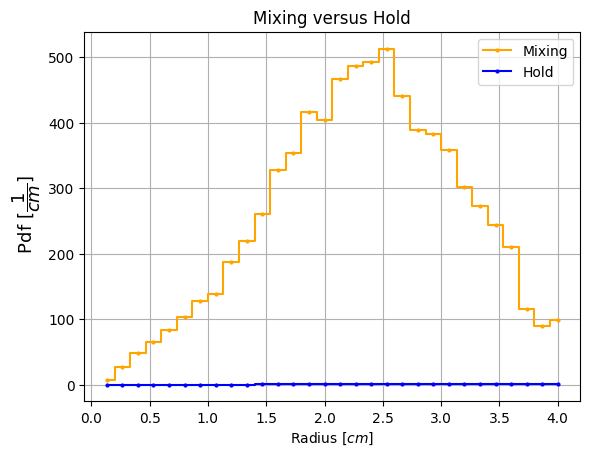

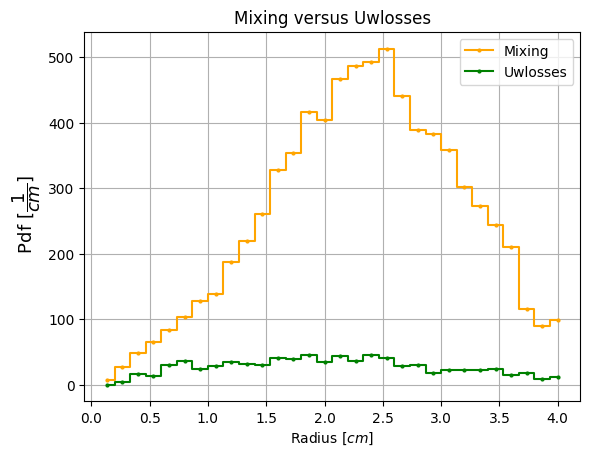

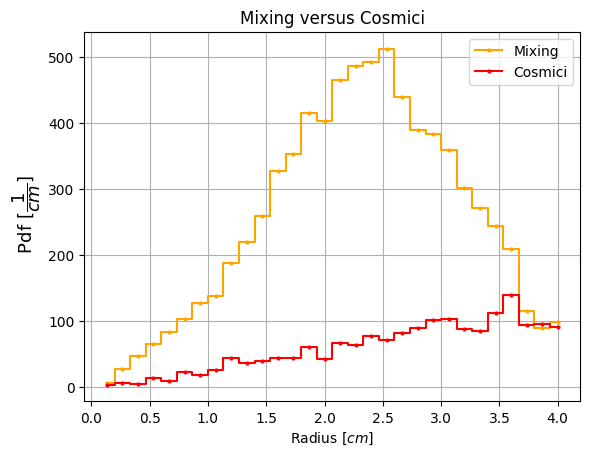

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(10)
plt.title("Mixing versus Hold")
plt.xlabel(r"Radius [$cm$]")
plt.ylabel(r" Pdf [$\dfrac{1}{cm}$]", fontsize = 13)
plt.grid()
plt.step(Mixedges, Mixcount, linestyle = '-', color = 'orange', marker = '.', markersize = 4,where='mid', label = "Mixing")
plt.step(Hdedges, HDcount, linestyle = '-', color = 'blue', marker = '.', markersize = 4,where='mid', label = "Hold")
plt.legend()

plt.figure(11)
plt.title("Mixing versus Uwlosses")
plt.xlabel(r"Radius [$cm$]")
plt.ylabel(r" Pdf [$\dfrac{1}{cm}$]", fontsize = 13)
plt.grid()
plt.step(Mixedges, Mixcount, linestyle = '-', color = 'orange', marker = '.', markersize = 4,where='mid', label = "Mixing")
plt.step(UWedges, UWcount, linestyle = '-', color = 'green', marker = '.', markersize = 4,where='mid', label = "Uwlosses")
plt.legend()

plt.figure(12)
plt.title("Mixing versus Cosmici")
plt.xlabel(r"Radius [$cm$]")
plt.ylabel(r" Pdf [$\dfrac{1}{cm}$]", fontsize = 13)
plt.grid()
plt.step(Mixedges, Mixcount, linestyle = '-', color = 'orange', marker = '.', markersize = 4,where='mid', label = "Mixing")
plt.step(BKedges, BKcount, linestyle = '-', color = 'red', marker = '.', markersize = 4,where='mid', label = "Cosmici")
plt.legend()

plt.figure()

# Fit alla distribuzione UWlosses

[ -259.2  2779.2 13140.   9388.8 23176.8 27021.6 17776.8 21283.2 24012.
 22946.4 21168.  28828.8 28036.8 31687.2 24933.6 29714.4 24364.8 31377.6
 27014.4 16862.4 17928.   7646.4 10749.6 11721.6 12643.2 11685.6  2016.
  8164.8   115.2  3607.2]
chisq =  264083.4517548315


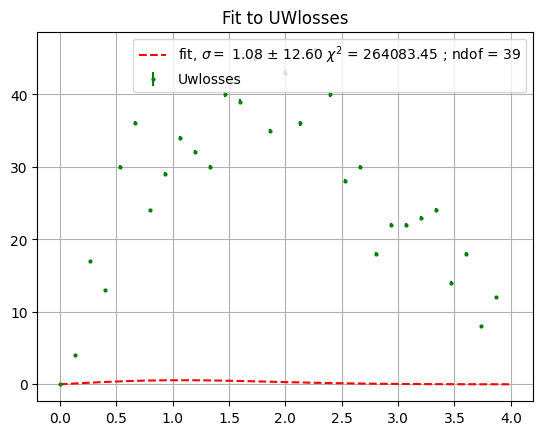

In [27]:
#Normalization
plt.title("Fit to UWlosses")
plt.grid()
FitCount = UWcount*len(Ruw1) - BKcount*(7.2*9)
print(FitCount)
FitCount[0] = 0
dataerror = np.sqrt(FitCount) + np.sqrt(BKcount*(7.2*9))
FitCount = FitCount/(len(Ruw1) - 7.2*9)
dataerror = dataerror/(len(Ruw1) - 7.2*9)

def Rayleigh(r, sigma):
    return (r/sigma**2) * np.exp(-(r**2)/(2*sigma**2))

popt, pcovm = curve_fit(Rayleigh, Mixedges - np.diff(Mixedges)[0], FitCount, )
error = np.sqrt(pcovm.diagonal())[0]

chisq = ((FitCount - Rayleigh(Mixedges - np.diff(Mixedges)[0],*popt))**2 / dataerror**2).sum()
print("chisq = ", chisq)

xx = np.linspace(0,4,100)
plt.plot(xx, Rayleigh(xx,*popt), linestyle = '--', color = 'red', label = r'fit, $\sigma =$ %.2f $\pm$ %.2f $\chi ^{2}$ = %.2f ; ndof = 39' % (popt,error, chisq))
plt.errorbar(UWedges - np.diff(Mixedges)[0], UWcount, dataerror, linestyle = '', color = 'green', marker = '.', markersize = 4, label = "Uwlosses")
plt.legend()

# FIT to mixing

Sembra che la distribuzione di Mixing sia ben descritta da una gaussiana, non è necessario costruire modelli convolutori particolari

sigma =  2.385805563315119  R =  0.8721282532444681


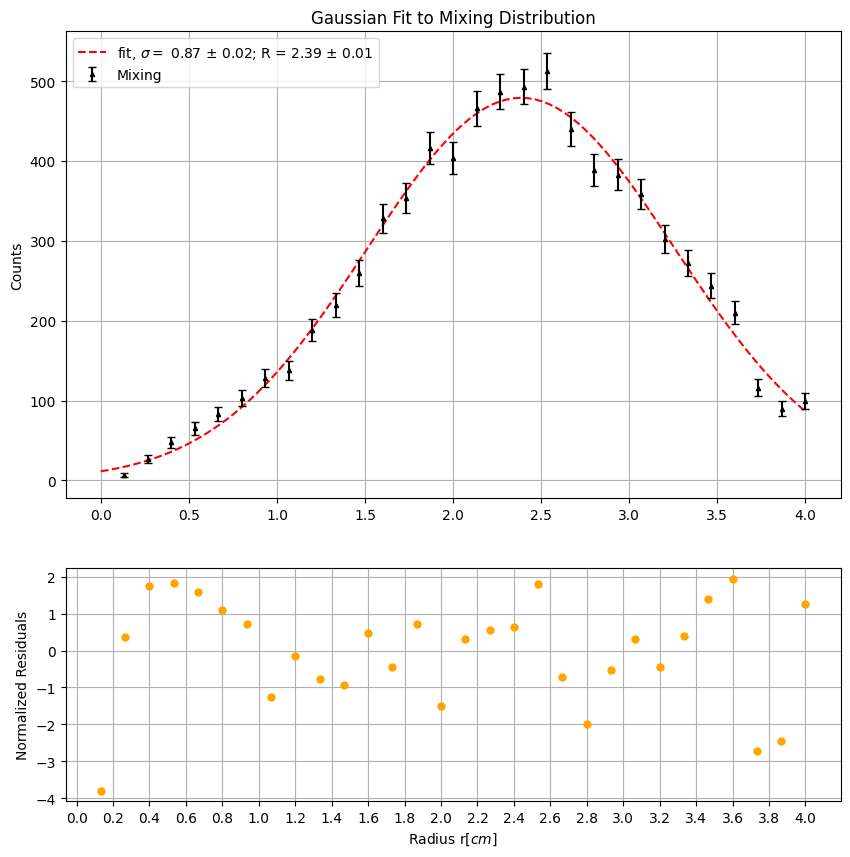

In [72]:
Mixcount, Mixedges, bars = plt.hist(Rmix1, range = (0,4), bins = 30, color = 'blue', label = "cut 1")
Mixedges = Mixedges[:-1] + np.diff(Mixedges)
plt.close()
#Normalization
fig, (a1,a2) = plt.subplots(2,1,height_ratios = [6,3], figsize = [10,10])
a1.set_title("Gaussian Fit to Mixing Distribution")
a2.set_xlabel(r"Radius r[$cm$]")
a1.set_ylabel("Counts")
a1.grid()
a2.grid()

def Rayleigh(r,R, sigma):
    return (r/sigma**2) * np.exp((-(r-R)**2)/(2*sigma**2))

def gaussiana(x,rho,sigma,N):
    return N*1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x -rho)**2/(2*sigma**2))

popt, pcovm = curve_fit(gaussiana, Mixedges, Mixcount)
error = np.sqrt(pcovm.diagonal())

print("sigma = " , popt[0], " R = ", popt[1])

xx = np.linspace(0,4,100)
plt.xticks(np.arange(0,4.4,0.2))
a1.plot(xx, gaussiana(xx,*popt), linestyle = '--', color = 'red', label = r'fit, $\sigma =$ %.2f $\pm$ %.2f; R = %.2f $\pm$ %.2f' % (popt[1],error[1],popt[0],error[0]))
a1.errorbar(Mixedges, Mixcount,np.sqrt(Mixcount), linestyle = '' ,color = 'black', marker = '^', markersize = 3,capsize = 3, label = "Mixing")

residue = (Mixcount - gaussiana(Mixedges,*popt))/ np.sqrt(Mixcount) 
a2.errorbar(Mixedges, residue, color = "orange", marker = '.', linestyle = '', markersize = 10)
a2.set_ylabel("Normalized Residuals")
a1.legend()
fig.savefig("./PlotMLEfit/SingleModel/GaussianFitMixing.pdf", format = "pdf",bbox_inches="tight")